In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors
from sklearn.neural_network import MLPClassifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

from sklearn.ensemble import IsolationForest

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
df = pd.read_csv('Cleaned2.csv')
df.head()

,Ville_id,sex,Age,Married,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,91,1,28,1,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,57,1,23,1,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,115,1,22,1,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,97,1,27,1,10,4,52667108,19698904,49647648,397715,44042267,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,42,0,59,0,10,6,82606287,17352654,23399979,80877619,74503502,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop('depressed', axis=1)
y = df['depressed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Clustering

Since our data set considt of both catergoric and quantitative variables we have applied kprototype clustering.But the silhoutte value was very low closer to 0 which is 0.27 and whem comsidering the observation withing the clusters we could observe that the clusters are imbalanced Cluster 0: 163 observations
Cluster 1: 199 observations
Cluster 2: 612 observations
Cluster 3: 153 observations.Additionally Kmeans and kprototype clustering algorithms are modified using custem distance mesures but both give low silhoute score values 0.28 and 0.05 .hence we do not further studied clustering.

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(28)

# Load and split data (if not already split)
# X = full feature set, y = target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate XGBoost models for outlier and regular clusters
xgb_outlier = XGBClassifier(random_state=28)
xgb_regular = XGBClassifier(random_state=28)

# Train models on respective clusters
xgb_outlier.fit(X_outliers_train, y_outliers_train)
xgb_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = xgb_outlier.predict(X_outliers_train)
outlier_test_preds = xgb_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = xgb_regular.predict(X_regular_train)
regular_test_preds = xgb_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")


Evaluation metrics – clusters after IsolationForest:
Outlier cluster - Train Accuracy: 1.0, Test Accuracy: 0.8117647058823529
Outlier cluster - Precision: 0.7627699180938198, Recall: 0.8117647058823529, F1-Score: 0.7841073271413828
Regular observations cluster - Train Accuracy: 0.9885931558935361, Test Accuracy: 0.8121827411167513
Regular observations cluster - Precision: 0.7398219278482043, Recall: 0.8121827411167513, F1-Score: 0.7714584788439081
Overall - Accuracy: 0.8120567375886525, Precision: 0.7474837359355837, Recall: 0.8120567375886525, F1-Score: 0.775474819492392


## KNN

In [ ]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate K-Nearest Neighbors models for outlier and regular clusters
from sklearn.neighbors import KNeighborsClassifier

# You may adjust the number of neighbors (n_neighbors) as needed
knn_outlier = KNeighborsClassifier(n_neighbors=5)
knn_regular = KNeighborsClassifier(n_neighbors=5)

# Train models on respective clusters
knn_outlier.fit(X_outliers_train, y_outliers_train)
knn_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = knn_outlier.predict(X_outliers_train)
outlier_test_preds = knn_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = knn_regular.predict(X_regular_train)
regular_test_preds = knn_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with K-Nearest Neighbors:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")

Evaluation metrics – clusters after IsolationForest with K-Nearest Neighbors:
Outlier cluster - Train Accuracy: 0.8284023668639053, Test Accuracy: 0.8117647058823529
Outlier cluster - Precision: 0.7315904139433551, Recall: 0.8117647058823529, F1-Score: 0.7695951107715814
Regular observations cluster - Train Accuracy: 0.8517110266159695, Test Accuracy: 0.8121827411167513
Regular observations cluster - Precision: 0.7219402143260012, Recall: 0.8121827411167513, F1-Score: 0.7644072857569424
Overall - Accuracy: 0.8120567375886525, Precision: 0.7248358287365378, Recall: 0.8120567375886525, F1-Score: 0.7659713258664002


## ADABOOST

In [ ]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate AdaBoost models for outlier and regular clusters
from sklearn.ensemble import AdaBoostClassifier

ada_outlier = AdaBoostClassifier(random_state=28)
ada_regular = AdaBoostClassifier(random_state=28)

# Train models on respective clusters
ada_outlier.fit(X_outliers_train, y_outliers_train)
ada_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = ada_outlier.predict(X_outliers_train)
outlier_test_preds = ada_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = ada_regular.predict(X_regular_train)
regular_test_preds = ada_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with AdaBoost:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")


Evaluation metrics – clusters after IsolationForest with AdaBoost:
Outlier cluster - Train Accuracy: 0.8964497041420119, Test Accuracy: 0.6941176470588235
Outlier cluster - Precision: 0.7136702568351284, Recall: 0.6941176470588235, F1-Score: 0.7037581699346405
Regular observations cluster - Train Accuracy: 0.8567807351077313, Test Accuracy: 0.8223350253807107
Regular observations cluster - Precision: 0.7233103888165413, Recall: 0.8223350253807107, F1-Score: 0.7696506087128657
Overall - Accuracy: 0.7836879432624113, Precision: 0.72087326078718, Recall: 0.7836879432624113, F1-Score: 0.7509693611381357


## GRADIENT BOOST

In [ ]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate Gradient Boosting models for outlier and regular clusters
from sklearn.ensemble import GradientBoostingClassifier

gb_outlier = GradientBoostingClassifier(random_state=28)
gb_regular = GradientBoostingClassifier(random_state=28)

# Train models on respective clusters
gb_outlier.fit(X_outliers_train, y_outliers_train)
gb_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = gb_outlier.predict(X_outliers_train)
outlier_test_preds = gb_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = gb_regular.predict(X_regular_train)
regular_test_preds = gb_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with Gradient Boosting:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")

Evaluation metrics – clusters after IsolationForest with Gradient Boosting:
Outlier cluster - Train Accuracy: 0.9792899408284024, Test Accuracy: 0.788235294117647
Outlier cluster - Precision: 0.7283693224125093, Recall: 0.788235294117647, F1-Score: 0.7571207430340557
Regular observations cluster - Train Accuracy: 0.9125475285171103, Test Accuracy: 0.8324873096446701
Regular observations cluster - Precision: 0.7523099547310885, Recall: 0.8324873096446701, F1-Score: 0.7828134310721303
Overall - Accuracy: 0.8191489361702128, Precision: 0.740116889939585, Recall: 0.8191489361702128, F1-Score: 0.7748025965884228


## MLP

In [ ]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate MLP models for outlier and regular clusters
from sklearn.neural_network import MLPClassifier

mlp_outlier = MLPClassifier(random_state=28, max_iter=300)  # Adjust parameters as needed
mlp_regular = MLPClassifier(random_state=28, max_iter=300)

# Train models on respective clusters
mlp_outlier.fit(X_outliers_train, y_outliers_train)
mlp_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = mlp_outlier.predict(X_outliers_train)
outlier_test_preds = mlp_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = mlp_regular.predict(X_regular_train)
regular_test_preds = mlp_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with MLP:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")

Evaluation metrics – clusters after IsolationForest with MLP:
Outlier cluster - Train Accuracy: 0.6124260355029586, Test Accuracy: 0.5882352941176471
Outlier cluster - Precision: 0.7498067327289338, Recall: 0.5882352941176471, F1-Score: 0.6484052694507578
Regular observations cluster - Train Accuracy: 0.7934093789607097, Test Accuracy: 0.7766497461928934
Regular observations cluster - Precision: 0.7632392869791051, Recall: 0.7766497461928934, F1-Score: 0.7696913395928028
Overall - Accuracy: 0.7198581560283688, Precision: 0.7569694748545248, Recall: 0.7198581560283688, F1-Score: 0.7370195418651705


## NAIVE BAYES

In [ ]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate Naive Bayes models for outlier and regular clusters
from sklearn.naive_bayes import GaussianNB

nb_outlier = GaussianNB()
nb_regular = GaussianNB()

# Train models on respective clusters
nb_outlier.fit(X_outliers_train, y_outliers_train)
nb_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = nb_outlier.predict(X_outliers_train)
outlier_test_preds = nb_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = nb_regular.predict(X_regular_train)
regular_test_preds = nb_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with Naive Bayes:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")


Evaluation metrics – clusters after IsolationForest with Naive Bayes:
Outlier cluster - Train Accuracy: 0.8165680473372781, Test Accuracy: 0.8588235294117647
Outlier cluster - Precision: 0.7375778546712802, Recall: 0.8588235294117647, F1-Score: 0.7935964259121371
Regular observations cluster - Train Accuracy: 0.8238276299112801, Test Accuracy: 0.8375634517766497
Regular observations cluster - Precision: 0.7253126798890575, Recall: 0.8375634517766497, F1-Score: 0.7774069607650671
Overall - Accuracy: 0.8439716312056738, Precision: 0.7290220900378759, Recall: 0.8439716312056738, F1-Score: 0.7822967812329514


## RANDOM FOREST

In [5]:
# Set random seed for reproducibility
np.random.seed(28)

# Step 1: Detect outliers using IsolationForest on X_train
iso_forest = IsolationForest(contamination=0.3, random_state=28)  # Adjust contamination as needed
outlier_labels_train = iso_forest.fit_predict(X_train)

# Separate training data into outlier and regular clusters
X_outliers_train = X_train[outlier_labels_train == -1]
y_outliers_train = y_train[outlier_labels_train == -1]
X_regular_train = X_train[outlier_labels_train == 1]
y_regular_train = y_train[outlier_labels_train == 1]

# Apply IsolationForest on X_test to obtain outlier labels for the test set
outlier_labels_test = iso_forest.fit_predict(X_test)
X_outliers_test = X_test[outlier_labels_test == -1]
y_outliers_test = y_test[outlier_labels_test == -1]
X_regular_test = X_test[outlier_labels_test == 1]
y_regular_test = y_test[outlier_labels_test == 1]

# Step 2: Fit separate Random Forest models for outlier and regular clusters
from sklearn.ensemble import RandomForestClassifier

# You may adjust the number of trees (n_estimators) as needed
rf_outlier = RandomForestClassifier(n_estimators=100, random_state=28)
rf_regular = RandomForestClassifier(n_estimators=100, random_state=28)

# Train models on respective clusters
rf_outlier.fit(X_outliers_train, y_outliers_train)
rf_regular.fit(X_regular_train, y_regular_train)

# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = rf_outlier.predict(X_outliers_train)
outlier_test_preds = rf_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = rf_regular.predict(X_regular_train)
regular_test_preds = rf_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_accuracy = accuracy_score(y_test, overall_test_preds)
overall_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with Random Forest:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_precision}, Recall: {outlier_recall}, F1-Score: {outlier_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_precision}, Recall: {regular_recall}, F1-Score: {regular_f1}")
print(f"Overall - Accuracy: {overall_accuracy}, Precision: {overall_precision}, Recall: {overall_recall}, F1-Score: {overall_f1}")


Evaluation metrics – clusters after IsolationForest with Random Forest:
Outlier cluster - Train Accuracy: 1.0, Test Accuracy: 0.8588235294117647
Outlier cluster - Precision: 0.7375778546712802, Recall: 0.8588235294117647, F1-Score: 0.7935964259121371
Regular observations cluster - Train Accuracy: 1.0, Test Accuracy: 0.8527918781725888
Regular observations cluster - Precision: 0.8070934483574866, Recall: 0.8527918781725888, F1-Score: 0.8021284601005343
Overall - Accuracy: 0.8546099290780141, Precision: 0.8074136435532425, Recall: 0.8546099290780141, F1-Score: 0.8000209531878453


In [8]:
# Step 3: Predict and calculate evaluation metrics for each cluster on train and test sets
# Outlier cluster
outlier_train_preds = rf_outlier.predict(X_outliers_train)
outlier_test_preds = rf_outlier.predict(X_outliers_test)
outlier_train_accuracy = accuracy_score(y_outliers_train, outlier_train_preds)
outlier_test_accuracy = accuracy_score(y_outliers_test, outlier_test_preds)
outlier_train_precision = precision_score(y_outliers_train, outlier_train_preds, average='weighted')
outlier_test_precision = precision_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_train_recall = recall_score(y_outliers_train, outlier_train_preds, average='weighted')
outlier_test_recall = recall_score(y_outliers_test, outlier_test_preds, average='weighted')
outlier_train_f1 = f1_score(y_outliers_train, outlier_train_preds, average='weighted')
outlier_test_f1 = f1_score(y_outliers_test, outlier_test_preds, average='weighted')

# Regular observations cluster
regular_train_preds = rf_regular.predict(X_regular_train)
regular_test_preds = rf_regular.predict(X_regular_test)
regular_train_accuracy = accuracy_score(y_regular_train, regular_train_preds)
regular_test_accuracy = accuracy_score(y_regular_test, regular_test_preds)
regular_train_precision = precision_score(y_regular_train, regular_train_preds, average='weighted')
regular_test_precision = precision_score(y_regular_test, regular_test_preds, average='weighted')
regular_train_recall = recall_score(y_regular_train, regular_train_preds, average='weighted')
regular_test_recall = recall_score(y_regular_test, regular_test_preds, average='weighted')
regular_train_f1 = f1_score(y_regular_train, regular_train_preds, average='weighted')
regular_test_f1 = f1_score(y_regular_test, regular_test_preds, average='weighted')

# Combined overall accuracy for the test set
overall_test_preds = np.zeros(len(X_test), dtype=int)
overall_test_preds[outlier_labels_test == -1] = outlier_test_preds
overall_test_preds[outlier_labels_test == 1] = regular_test_preds

overall_test_accuracy = accuracy_score(y_test, overall_test_preds)
overall_test_precision = precision_score(y_test, overall_test_preds, average='weighted')
overall_test_recall = recall_score(y_test, overall_test_preds, average='weighted')
overall_test_f1 = f1_score(y_test, overall_test_preds, average='weighted')

# Combined overall accuracy for the train set
overall_train_preds = np.zeros(len(X_train), dtype=int)
overall_train_preds[outlier_labels_train == -1] = outlier_train_preds
overall_train_preds[outlier_labels_train == 1] = regular_train_preds

overall_train_accuracy = accuracy_score(y_train, overall_train_preds)
overall_train_precision = precision_score(y_train, overall_train_preds, average='weighted')
overall_train_recall = recall_score(y_train, overall_train_preds, average='weighted')
overall_train_f1 = f1_score(y_train, overall_train_preds, average='weighted')

# Print results
print("Evaluation metrics – clusters after IsolationForest with Random Forest:")
print(f"Outlier cluster - Train Accuracy: {outlier_train_accuracy}, Test Accuracy: {outlier_test_accuracy}")
print(f"Outlier cluster - Precision: {outlier_test_precision}, Recall: {outlier_test_recall}, F1-Score: {outlier_test_f1}")
print(f"Regular observations cluster - Train Accuracy: {regular_train_accuracy}, Test Accuracy: {regular_test_accuracy}")
print(f"Regular observations cluster - Precision: {regular_test_precision}, Recall: {regular_test_recall}, F1-Score: {regular_test_f1}")
print(f"Overall (Train) - Accuracy: {overall_train_accuracy}, Precision: {overall_train_precision}, Recall: {overall_train_recall}, F1-Score: {overall_train_f1}")
print(f"Overall (Test) - Accuracy: {overall_test_accuracy}, Precision: {overall_test_precision}, Recall: {overall_test_recall}, F1-Score: {overall_test_f1}")


Evaluation metrics – clusters after IsolationForest with Random Forest:
Outlier cluster - Train Accuracy: 1.0, Test Accuracy: 0.8588235294117647
Outlier cluster - Precision: 0.7375778546712802, Recall: 0.8588235294117647, F1-Score: 0.7935964259121371
Regular observations cluster - Train Accuracy: 1.0, Test Accuracy: 0.8527918781725888
Regular observations cluster - Precision: 0.8070934483574866, Recall: 0.8527918781725888, F1-Score: 0.8021284601005343
Overall (Train) - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Overall (Test) - Accuracy: 0.8546099290780141, Precision: 0.8074136435532425, Recall: 0.8546099290780141, F1-Score: 0.8000209531878453


In [7]:
print(f"Overall (Train) - Accuracy:{overall_train_accuracy} ,Precision: {overall_train_precision}, Recall: {overall_train_recall}, F1-Score: {overall_train_f1}")

print(f"Overall (Test) - Accuracy: {overall_test_accuracy}, Precision: {overall_test_precision}, Recall: {overall_test_recall}, F1-Score: {overall_test_f1}")

Overall (Train) - Accuracy:0.8527918781725888 ,Precision:0.8070934483574866, Recall: 0.8527918781725888, F1-Score: 0.8021284601005343
Overall (Test) - Accuracy: 0.8546099290780141, Precision: 0.8074136435532425, Recall: 0.8546099290780141, F1-Score: 0.8000209531878453


### Feature importance

Overall Feature Importances:
                  Feature  Importance
0                Ville_id    0.149288
2                     Age    0.131152
4         education_level    0.080444
17     lasting_investment    0.078193
18   no_lasting_investmen    0.063115
9         living_expenses    0.061341
15          farm_expenses    0.060641
10         other_expenses    0.058327
14  incoming_agricultural    0.056975
6            gained_asset    0.053840
7           durable_asset    0.053723
8              save_asset    0.053336
5           total_members    0.037300
3                 Married    0.016659
1                     sex    0.013413
16          labor_primary    0.009394
13   incoming_no_business    0.009140
11      incoming_own_farm    0.008046
12      incoming_business    0.005675


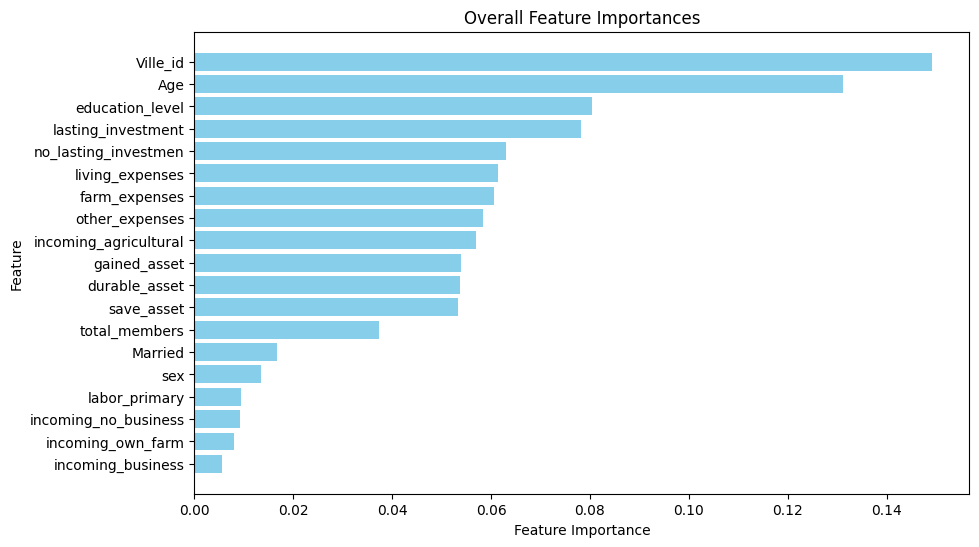

In [ ]:
# Get feature importances from each model
outlier_feature_importances = rf_outlier.feature_importances_
regular_feature_importances = rf_regular.feature_importances_

# Calculate the average feature importance across both models
overall_feature_importances = (outlier_feature_importances + regular_feature_importances) / 2

# Display the feature importances
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(len(overall_feature_importances))]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": overall_feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("Overall Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Overall Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Model with only top 10 features

# 1. Identify the top 10 features
top_10_features = importance_df["Feature"].head(10).values

# 2. Subset the training and test data to include only these top 10 features
X_outliers_train_top10 = X_outliers_train[top_10_features]
X_regular_train_top10 = X_regular_train[top_10_features]
X_outliers_test_top10 = X_outliers_test[top_10_features]
X_regular_test_top10 = X_regular_test[top_10_features]

# 3. Fit separate Random Forest models for outlier and regular clusters using only the top 10 features
rf_outlier_top10 = RandomForestClassifier(n_estimators=100, random_state=28)
rf_regular_top10 = RandomForestClassifier(n_estimators=100, random_state=28)

# Train models on respective clusters
rf_outlier_top10.fit(X_outliers_train_top10, y_outliers_train)
rf_regular_top10.fit(X_regular_train_top10, y_regular_train)

# Step 4: Evaluate the models on the test set
# Outlier cluster predictions
outlier_test_preds_top10 = rf_outlier_top10.predict(X_outliers_test_top10)
outlier_test_accuracy_top10 = accuracy_score(y_outliers_test, outlier_test_preds_top10)
outlier_precision_top10 = precision_score(y_outliers_test, outlier_test_preds_top10, average='weighted')
outlier_recall_top10 = recall_score(y_outliers_test, outlier_test_preds_top10, average='weighted')
outlier_f1_top10 = f1_score(y_outliers_test, outlier_test_preds_top10, average='weighted')

# Regular cluster predictions
regular_test_preds_top10 = rf_regular_top10.predict(X_regular_test_top10)
regular_test_accuracy_top10 = accuracy_score(y_regular_test, regular_test_preds_top10)
regular_precision_top10 = precision_score(y_regular_test, regular_test_preds_top10, average='weighted')
regular_recall_top10 = recall_score(y_regular_test, regular_test_preds_top10, average='weighted')
regular_f1_top10 = f1_score(y_regular_test, regular_test_preds_top10, average='weighted')

# Combined overall accuracy for the test set with top 10 features
overall_test_preds_top10 = np.zeros(len(X_test), dtype=int)
overall_test_preds_top10[outlier_labels_test == -1] = outlier_test_preds_top10
overall_test_preds_top10[outlier_labels_test == 1] = regular_test_preds_top10

overall_accuracy_top10 = accuracy_score(y_test, overall_test_preds_top10)
overall_precision_top10 = precision_score(y_test, overall_test_preds_top10, average='weighted')
overall_recall_top10 = recall_score(y_test, overall_test_preds_top10, average='weighted')
overall_f1_top10 = f1_score(y_test, overall_test_preds_top10, average='weighted')

# Print results
print("Evaluation metrics with Top 10 Features:")
print(f"Outlier cluster - Test Accuracy: {outlier_test_accuracy_top10}")
print(f"Outlier cluster - Precision: {outlier_precision_top10}, Recall: {outlier_recall_top10}, F1-Score: {outlier_f1_top10}")
print(f"Regular observations cluster - Test Accuracy: {regular_test_accuracy_top10}")
print(f"Regular observations cluster - Precision: {regular_precision_top10}, Recall: {regular_recall_top10}, F1-Score: {regular_f1_top10}")
print(f"Overall - Accuracy: {overall_accuracy_top10}, Precision: {overall_precision_top10}, Recall: {overall_recall_top10}, F1-Score: {overall_f1_top10}")


Evaluation metrics with Top 10 Features:
Outlier cluster - Test Accuracy: 0.8470588235294118
Outlier cluster - Precision: 0.7361344537815125, Recall: 0.8470588235294118, F1-Score: 0.7877107530910453
Regular observations cluster - Test Accuracy: 0.8324873096446701
Regular observations cluster - Precision: 0.7246521659083138, Recall: 0.8324873096446701, F1-Score: 0.7748358339075045
Overall - Accuracy: 0.8368794326241135, Precision: 0.7281153186368641, Recall: 0.8368794326241135, F1-Score: 0.7787179276540979


In [ ]:
# Model with only top 15 features

# 1. Identify the top 15 features
top_15_features = importance_df["Feature"].head(15).values

# 2. Subset the training and test data to include only these top 15 features
X_outliers_train_top15 = X_outliers_train[top_15_features]
X_regular_train_top15 = X_regular_train[top_15_features]
X_outliers_test_top15 = X_outliers_test[top_15_features]
X_regular_test_top15 = X_regular_test[top_15_features]

# 3. Fit separate Random Forest models for outlier and regular clusters using only the top 15 features
rf_outlier_top15 = RandomForestClassifier(n_estimators=100, random_state=28)
rf_regular_top15 = RandomForestClassifier(n_estimators=100, random_state=28)

# Train models on respective clusters
rf_outlier_top15.fit(X_outliers_train_top15, y_outliers_train)
rf_regular_top15.fit(X_regular_train_top15, y_regular_train)

# Step 4: Evaluate the models on the test set
# Outlier cluster predictions
outlier_test_preds_top15 = rf_outlier_top15.predict(X_outliers_test_top15)
outlier_test_accuracy_top15 = accuracy_score(y_outliers_test, outlier_test_preds_top15)
outlier_precision_top15 = precision_score(y_outliers_test, outlier_test_preds_top15, average='weighted')
outlier_recall_top15 = recall_score(y_outliers_test, outlier_test_preds_top15, average='weighted')
outlier_f1_top15 = f1_score(y_outliers_test, outlier_test_preds_top15, average='weighted')

# Regular cluster predictions
regular_test_preds_top15 = rf_regular_top15.predict(X_regular_test_top15)
regular_test_accuracy_top15 = accuracy_score(y_regular_test, regular_test_preds_top15)
regular_precision_top15 = precision_score(y_regular_test, regular_test_preds_top15, average='weighted')
regular_recall_top15 = recall_score(y_regular_test, regular_test_preds_top15, average='weighted')
regular_f1_top15 = f1_score(y_regular_test, regular_test_preds_top15, average='weighted')

# Combined overall accuracy for the test set with top 15 features
overall_test_preds_top15 = np.zeros(len(X_test), dtype=int)
overall_test_preds_top15[outlier_labels_test == -1] = outlier_test_preds_top15
overall_test_preds_top15[outlier_labels_test == 1] = regular_test_preds_top15

overall_accuracy_top15 = accuracy_score(y_test, overall_test_preds_top15)
overall_precision_top15 = precision_score(y_test, overall_test_preds_top15, average='weighted')
overall_recall_top15 = recall_score(y_test, overall_test_preds_top15, average='weighted')
overall_f1_top15 = f1_score(y_test, overall_test_preds_top15, average='weighted')

# Print results
print("Evaluation metrics with Top 15 Features:")
print(f"Outlier cluster - Test Accuracy: {outlier_test_accuracy_top15}")
print(f"Outlier cluster - Precision: {outlier_precision_top15}, Recall: {outlier_recall_top15}, F1-Score: {outlier_f1_top15}")
print(f"Regular observations cluster - Test Accuracy: {regular_test_accuracy_top15}")
print(f"Regular observations cluster - Precision: {regular_precision_top15}, Recall: {regular_recall_top15}, F1-Score: {regular_f1_top15}")
print(f"Overall - Accuracy: {overall_accuracy_top15}, Precision: {overall_precision_top15}, Recall: {overall_recall_top15}, F1-Score: {overall_f1_top15}")

Evaluation metrics with Top 15 Features:
Outlier cluster - Test Accuracy: 0.8470588235294118
Outlier cluster - Precision: 0.7361344537815125, Recall: 0.8470588235294118, F1-Score: 0.7877107530910453
Regular observations cluster - Test Accuracy: 0.8477157360406091
Regular observations cluster - Precision: 0.7787778882550979, Recall: 0.8477157360406091, F1-Score: 0.7913190257172504
Overall - Accuracy: 0.8475177304964538, Precision: 0.7679919893872137, Recall: 0.8475177304964538, F1-Score: 0.7902658777335939
